<a href="https://colab.research.google.com/github/Samad-OG/CodeAlpha_Unemployement_Analysis/blob/main/Unemployement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-333985651.py:9: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
/tmp/ipython-input-333985651.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=df, palette='viridis', ci=None)
/tmp/ipython-input-333985651.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=df, palette='viridis', ci=None)


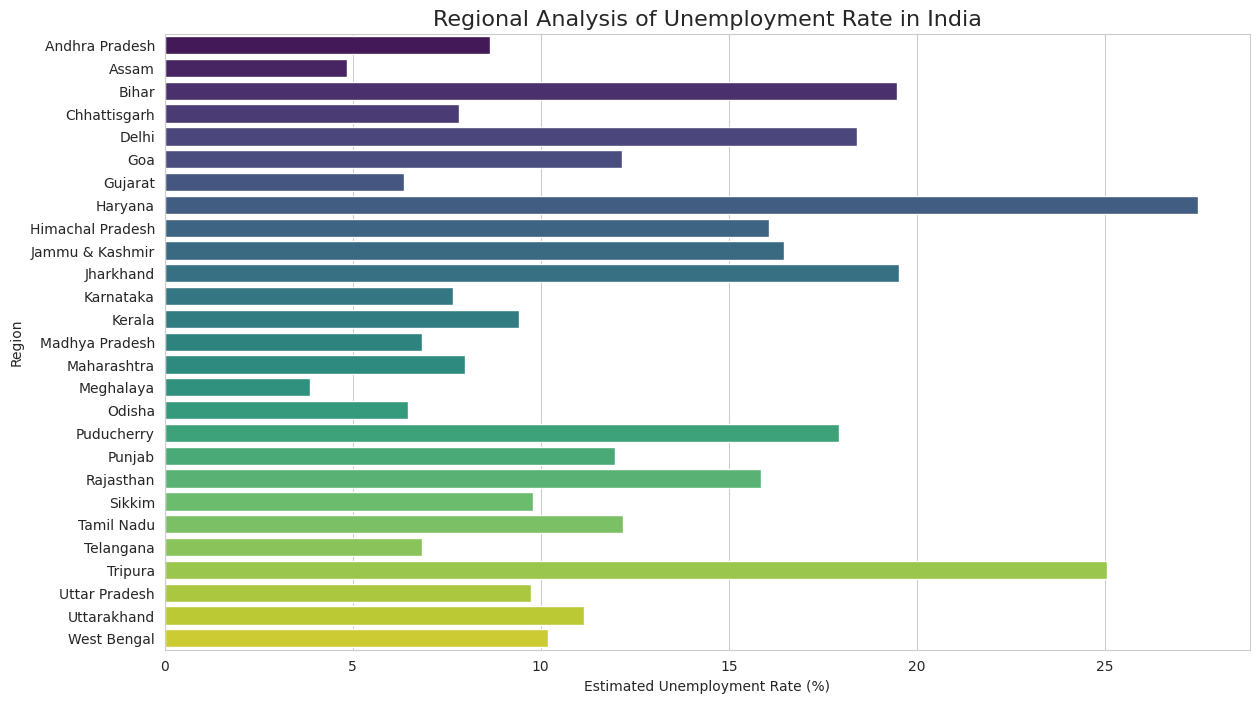

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
df.columns = df.columns.str.strip()
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.title("Regional Analysis of Unemployment Rate in India", fontsize=16)
sns.barplot(x='Estimated Unemployment Rate (%)', y='Region', data=df, palette='viridis', ci=None)
plt.show()

numeric_df = df.select_dtypes(include=[np.number])
fig_corr = px.imshow(numeric_df.corr(), text_auto=True, aspect="auto", color_continuous_scale='RdBu_r', title="Economic Indicators Correlation Heatmap")
fig_corr.show()

fig_sunburst = px.sunburst(df, path=["Region", "Region.1"],
                           values="Estimated Unemployment Rate (%)",
                           color="Estimated Unemployment Rate (%)",
                           color_continuous_scale="RdYlGn",
                           title="Unemployment Rate Breakdown by Region and Sub-Region",
                           template='plotly_dark',
                           width=800, height=800)
fig_sunburst.show()

fig_scatter = px.scatter(df, x='Estimated Unemployment Rate (%)', y='Estimated Labour Participation Rate (%)',
                         color='Region', size='Estimated Employed', hover_data=['Region.1'],
                         title="Unemployment vs Labour Participation (Bubble Size = Employed Population)",
                         template='plotly_white')
fig_scatter.show()